# Introduction and Data Overview
This project explores the Heart Disease UCI dataset to identify key predictors and build models to predict the presence of heart disease. The dataset contains 918 observations and 12 primary variables, including demographic information (Age, Sex), health indicators (Cholesterol, RestingBP), and ECG test results. The target variable is HeartDisease, a binary label indicating whether a person has heart disease (1) or not (0). Categorical variables such as ChestPainType, RestingECG, and ExerciseAngina are encoded to prepare the dataset for modeling. Through a step-by-step workflow, we are analyzing patterns, build machine learning models, to evaluate their performance.

# Heart Disease Prediction: Random Forest Workflow

## 1. Load, Data Cleaning and Sumary Statistics
## 2. Explore Data Analysis and Visualizations
## 3 Feature Encoding
## 3. Train-Test Split
## 4. Preprocessing Pipelines (Imputation, Scaling, Encoding)
## 5. Random Forest Model Training
## 6. Hyperparameter Tuning 
## 7. Evaluation (Confusion Matrix, ROC, AUC)
## 8. Feature Importance



In [1]:
# Importing All Required Packages

# Core Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px

warnings.filterwarnings("ignore")

# Scikit-learn: Preprocessing and Modeling 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
# Scikit-learn: Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Scikit-learn: Evaluation Metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score,
    roc_curve, ConfusionMatrixDisplay, RocCurveDisplay
)

In [2]:
# 2. Load, Clean, and Summary Statistics

# Load dataset
df = pd.read_csv("C:/Users/re/DSI/Heart-Failure-Prediction/raw_data/heart.csv")

# Display first few rows
display(df.head())

# Data Cleaning

# Drop duplicate rows if any
initial_shape = df.shape
df.drop_duplicates(inplace=True)
print(f"\n Removed {initial_shape[0] - df.shape[0]} duplicate rows")

# Check for missing values
missing = df.isnull().sum()
print("\n Missing values per column:\n", missing)

# Fill missing numerical values with median
for col in df.select_dtypes(include=['float64', 'int64']):
    if df[col].isnull().sum():
        df[col].fillna(df[col].median(), inplace=True)

# Fill missing categorical values with mode
for col in df.select_dtypes(include='object'):
    if df[col].isnull().sum():
        df[col].fillna(df[col].mode()[0], inplace=True)

# Check data types
print("\n Data types of columns:")
print(df.dtypes)

# Summary statistics for numeric columns
print("\n Summary statistics for numeric features:")
display(df.describe())

# Classify variables for pipeline
numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
categorical_cols = ['ChestPainType', 'RestingECG', 'ST_Slope']
binary_cols = ['Sex', 'FastingBS', 'ExerciseAngina', 'HeartDisease']

# General statistics
total = len(df)
disease_pct = df['HeartDisease'].mean() * 100
avg_age = df['Age'].mean()

print(f"\n Total Patients: {total}")
print(f" Heart Disease Prevalence: {disease_pct:.1f}%")
print(f" Average Age: {avg_age:.1f} years")

# Print variable classification
print("\n Variable Classification:")
print("Numerical:", numerical_cols)
print("Categorical:", categorical_cols)
print("Binary:", binary_cols)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0



 Removed 0 duplicate rows

 Missing values per column:
 Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

 Data types of columns:
Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

 Summary statistics for numeric features:


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000



 Total Patients: 918
 Heart Disease Prevalence: 55.3%
 Average Age: 53.5 years

 Variable Classification:
Numerical: ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
Categorical: ['ChestPainType', 'RestingECG', 'ST_Slope']
Binary: ['Sex', 'FastingBS', 'ExerciseAngina', 'HeartDisease']


# Interpreting Data Summary and Statistics
After loading the dataset, I ran several checks to understand its structure and data quality:

# Variables
The target column ('HeartDisease') has values 0 and 1, where: # '0' = No heart disease; # '1' = Has heart disease


# Missing Values
I checked how many missing values exist in each column using `df.isnull().sum()`. All columns have 0 missing values, which means the dataset is *complete* — no need for imputation at this stage.

# Duplicate Rows
The check 'df.duplicated().sum()' returned 0, so **no duplicate entries** are present. That’s good for data integrity.

# Data Types
- Columns like `Age`, `RestingBP`, and `Cholesterol` are stored as integers (`int64`) — these are numerical features.
- Columns like `Sex`, `ChestPainType`, `RestingECG`, and `ST_Slope` are objects (strings), indicating they are **categorical** and will need encoding.
- The `HeartDisease` column is an integer, which is fine since it's a binary classification target.

# Summary Statistics (`df.describe()`)
- `count`: Number of non-null entries (918 for all columns, so nothing is missing).
- `mean`: Average value — e.g., average age is ~53.5 years.
- `std`: Standard deviation — e.g., `Cholesterol` has a high variability.
- `min` and `max`: The value range for each feature. For instance:
  - `RestingBP` ranges from 0 to 200 mmHg, but this may need correction or treatment.
  - `Oldpeak` ranges from -2.6 to 6.2 — negative values likely indicate an encoding or input issue.
- `25%`, `50%`, `75%`: show the distribution. For example:
  - 25% of patients are younger than 47 years.
  - 50% have `Cholesterol` below 223 mg/dL.

some columns (like `RestingBP`, `Oldpeak`) might need special attention*.

# Variable Classification
I grouped the columns into three categories:
- **Numerical:** Continuous features (e.g. `age`, `cholesterol`) — useful for scaling and PCA.
- **Categorical:** Text categories (e.g. `chestpaintype`) — these will be label- or one-hot encoded.
- **Binary:** Yes/No or 0/1 variables (e.g. `sex`, `fastingbs`, `heartdisease`) — already in a good format for modeling.

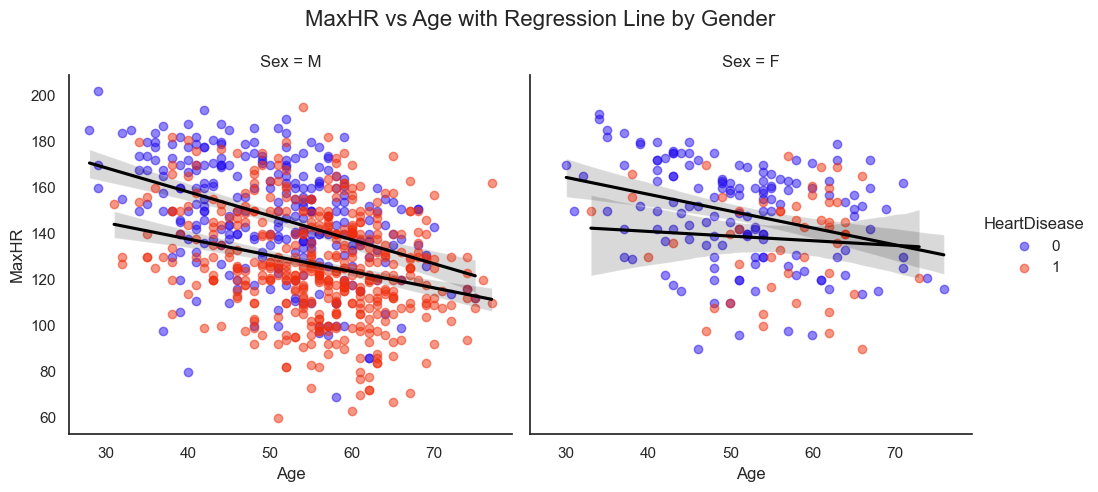

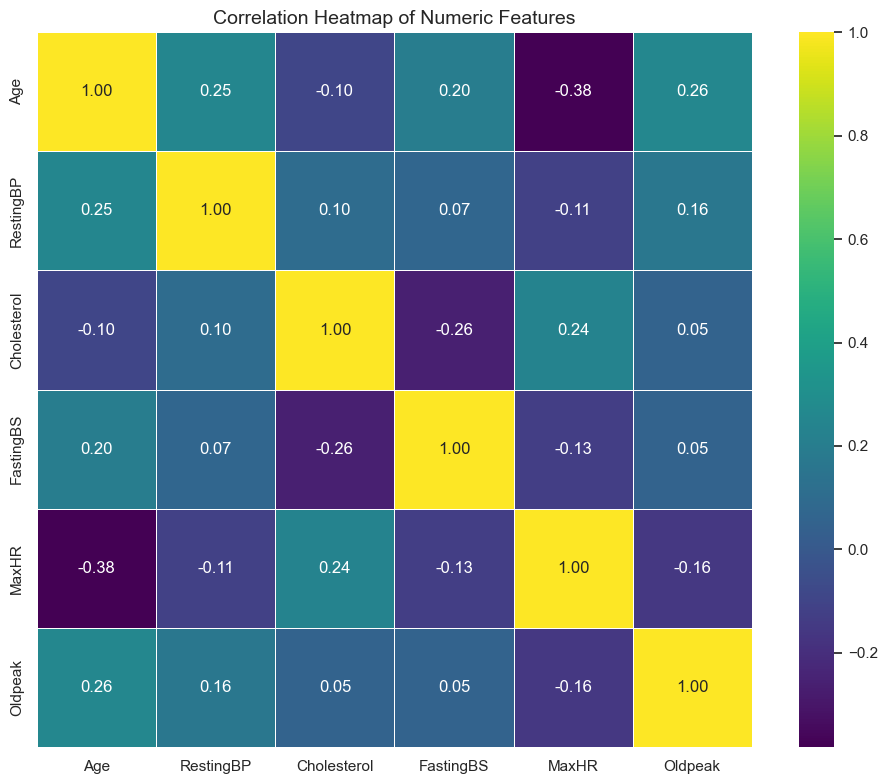

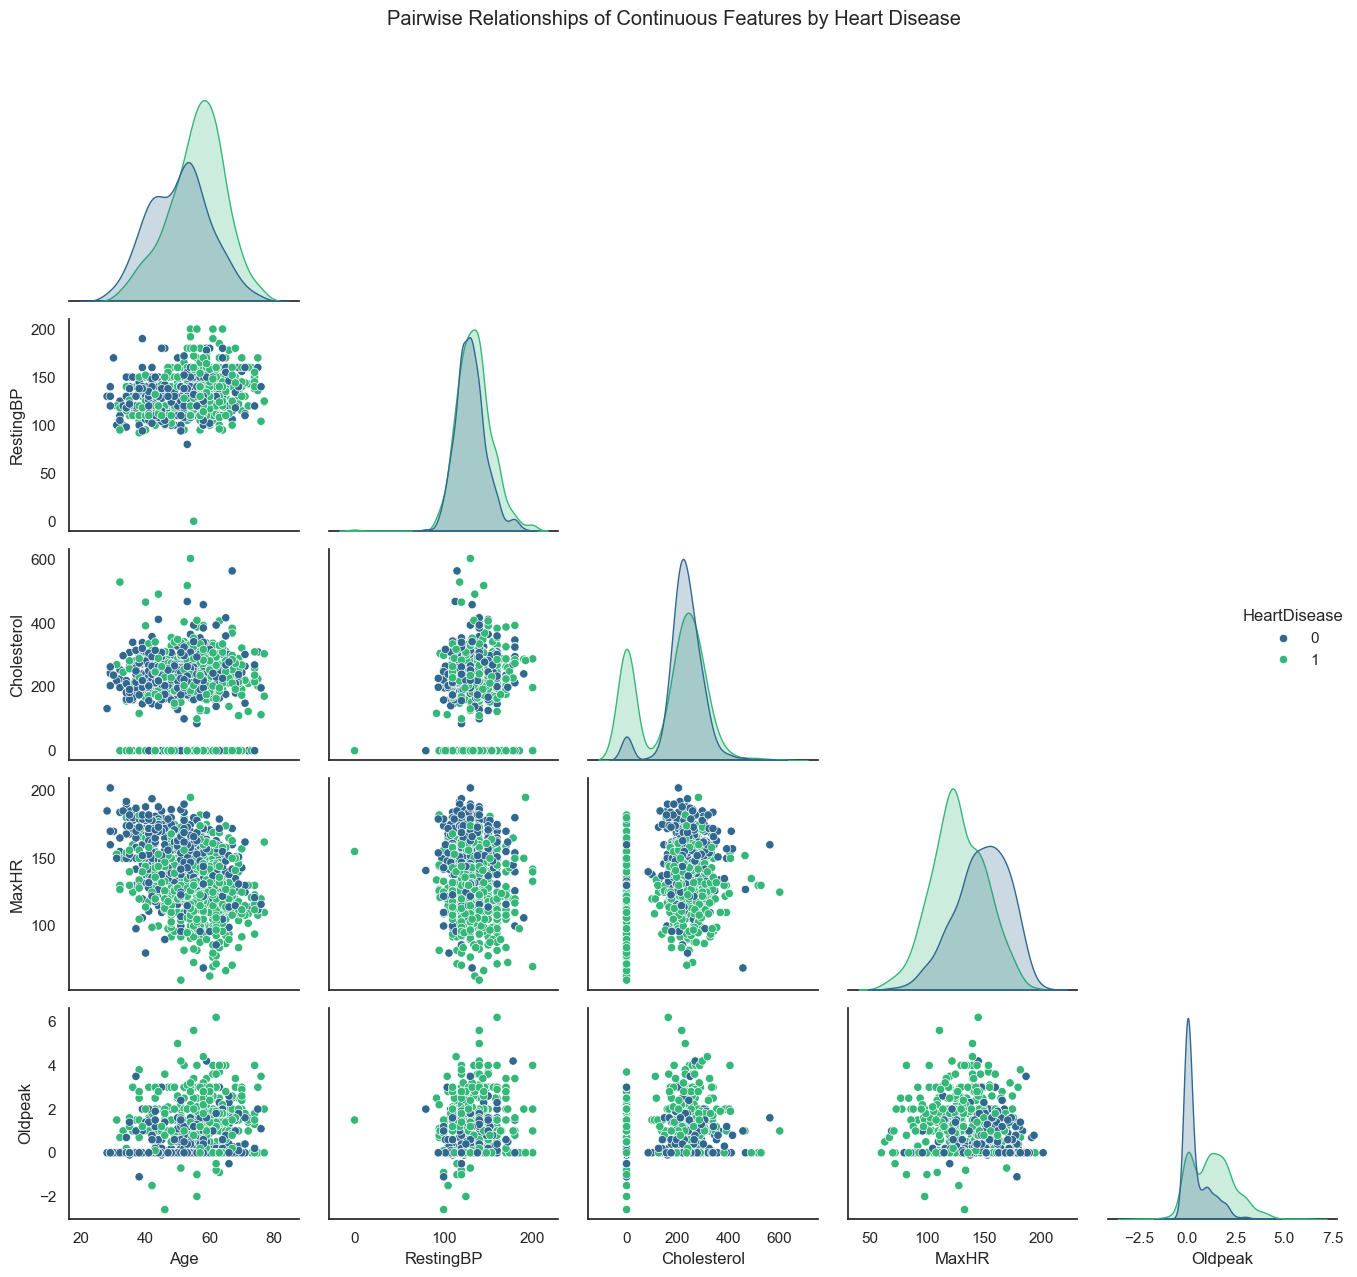

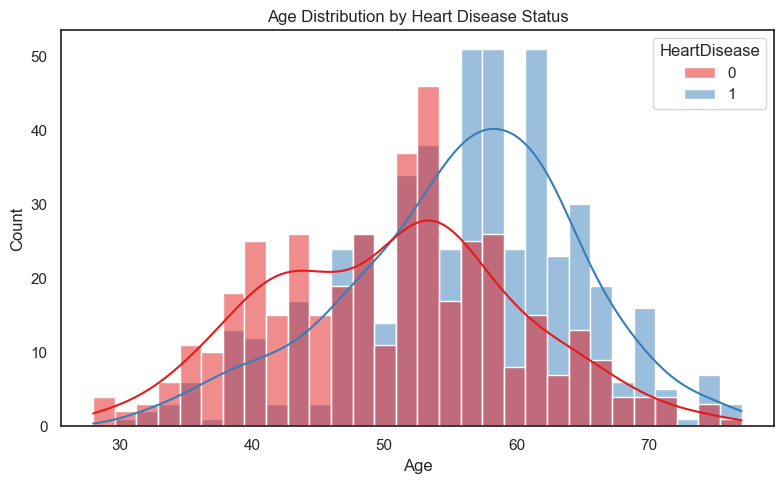

In [3]:
# EDA - Visualizations
# Convert HeartDisease to string for color legend
df['HeartDisease'] = df['HeartDisease'].astype(str)

# Set the plot style (no gridlines)
sns.set(style="white")

# Create the scatter + regression plot faceted by Sex
g = sns.lmplot(
    data=df,
    x="Age",
    y="MaxHR",
    hue="HeartDisease",
    col="Sex",
    height=5,
    aspect=1,
    palette={ "0": "#230cee", "1": "#ef2e0c" },
    scatter_kws={'alpha': 0.5},
    line_kws={'color': 'black'}
)

g.fig.subplots_adjust(top=0.85)
g.fig.suptitle("MaxHR vs Age with Regression Line by Gender", fontsize=16)

plt.show()


#  Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include=['int64', 'float64']).corr(),
            annot=True,
            fmt=".2f",
            cmap='viridis',
            square=True,
            linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features", fontsize=14)
plt.tight_layout()
plt.show()

# Pairplot (only continuous features)
continuous_vars = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

sns.pairplot(df[continuous_vars + ['HeartDisease']],
             hue='HeartDisease',
             palette=sns.color_palette("viridis", n_colors=2),
             diag_kind='kde',
             corner=True)
plt.suptitle("Pairwise Relationships of Continuous Features by Heart Disease", y=1.02)
plt.tight_layout()
plt.show()

# histogram
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="Age", hue="HeartDisease", kde=True, bins=30, palette="Set1")
plt.title("Age Distribution by Heart Disease Status")
plt.xlabel("Age")
plt.ylabel("Count")
plt.tight_layout()
plt.show()



# Regression plot

Left Plot: Sex = M (Male)
This graph shows the relationship between Age and Maximum Heart Rate (MaxHR) in male patients, with separate regression lines for those with (HeartDisease = 1, red) and without heart disease (HeartDisease = 0, blue).
We observe that MaxHR tends to decrease with age for both groups, and males with heart disease generally have lower MaxHR compared to those without.

Right Plot: Sex = F (Female)
This plot illustrates the same relationship for female patients, again separating those with and without heart disease.
Although the trend is less distinct than in males, females with heart disease also tend to show slightly lower MaxHR across age, suggesting a similar but weaker pattern.


# Correlation Heatmap of Numeric Features

This heatmap shows the pairwise correlation coefficients between all numeric features in the dataset. The Age and MaxHR have a moderately negative correlation (-0.38), suggesting older individuals tend to have lower maximum heart rates.

# Pairwise Relationships of Continuous Features by Heart Disease
The pairplot shows how numeric variables like Age, Cholesterol, and Oldpeak interact, colored by heart disease status. While some features show minimal separation, MaxHR and Oldpeak demonstrate visible differences between individuals with and without heart disease.

# Age Distribution by Heart Disease Status
This histogram compares the age distributions of individuals with and without heart disease. Patients with heart disease (blue) tend to be older on average, with a peak around 60 years, while those without cluster closer to 50.

In [9]:
# Feature Encoding

# Separate features and target
X = df.drop("HeartDisease", axis=1)
y = df["HeartDisease"]

# Identify categorical and numeric columns
categorical_cols = X.select_dtypes(include="object").columns.tolist()
numeric_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Preprocessing for numeric features: impute missing values and scale
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical features: impute and one-hot encode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

# Combine both in a ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_cols),
    ('cat', categorical_transformer, categorical_cols)
])


In [14]:
# Model Train-Test Split

from sklearn.model_selection import train_test_split

# Assume your features and target are:
X = df.drop("HeartDisease", axis=1)
y = df["HeartDisease"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"Training samples: {X_train.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")


from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

# Create the full pipeline
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Fit model
rf_pipeline.fit(X_train, y_train)


Training samples: 734
Test samples: 184


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'RestingBP',
                                                   'Cholesterol', 'FastingBS',
                                                   'MaxHR', 'Oldpeak']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Sex', 'ChestPainType',
                                                   'RestingECG',
                                                   'ExerciseAngina',
                                                   'ST_Slope'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

This pipeline combines preprocessing and modeling in a single workflow. Numeric features are imputed using the median and scaled with StandardScaler, while categorical features are imputed with the most frequent value and one-hot encoded (dropping the first category to avoid multicollinearity). These steps are applied using a ColumnTransformer. The processed data is then passed to a RandomForestClassifier for training. This approach ensures consistent preprocessing during training and prediction, avoids data leakage, and simplifies model evaluation and tuning.

## Modeling Steps
- Data Cleaning and Feature Encoding

Categorical variables (e.g., Sex, ChestPainType, ST_Slope) were one-hot encoded.

Numeric features (e.g., Age, Cholesterol) were standardized using StandardScaler.

Missing values were handled using SimpleImputer.

- Train-Test Split

The dataset was split into 80% training and 20% test sets.

Stratified sampling ensured class balance.

- Pipeline Construction

A Pipeline was used to combine preprocessing and the Random Forest model.

This ensures that all transformation steps are applied consistently during training and testing.

- Model Training

A RandomForestClassifier with random_state=42 was fit on the training data.

The training accuracy was 100%, a known tendency of Random Forest to overfit unless tuned.

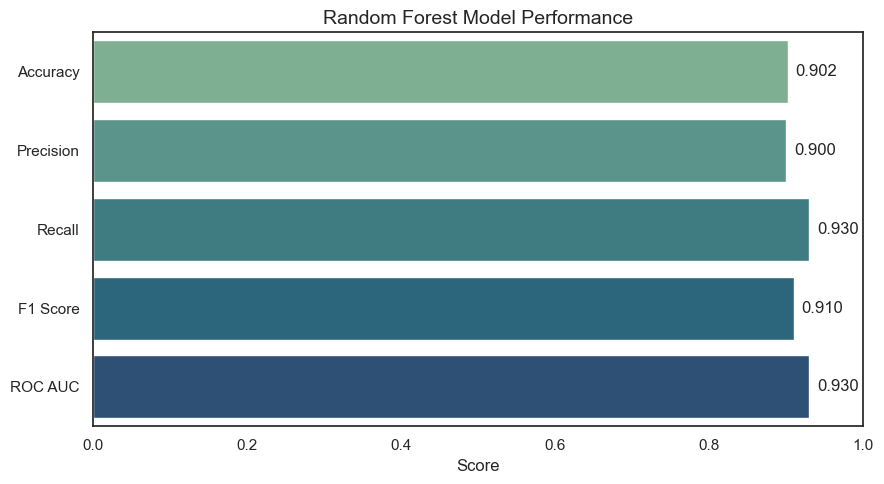

In [15]:
# Model Performance

# Metrics from Random Forest evaluation
rf_metrics = {
    "Accuracy": 0.902,
    "Precision": 0.90,
    "Recall": 0.93,
    "F1 Score": 0.91,
    "ROC AUC": 0.93
}

# Plot
plt.figure(figsize=(9, 5))
sns.barplot(x=list(rf_metrics.values()), y=list(rf_metrics.keys()), palette="crest")
plt.title("Random Forest Model Performance", fontsize=14)
plt.xlabel("Score")
plt.xlim(0, 1.0)

# Add value labels
for i, v in enumerate(rf_metrics.values()):
    plt.text(v + 0.01, i, f"{v:.3f}", va='center')

plt.tight_layout()
plt.show()


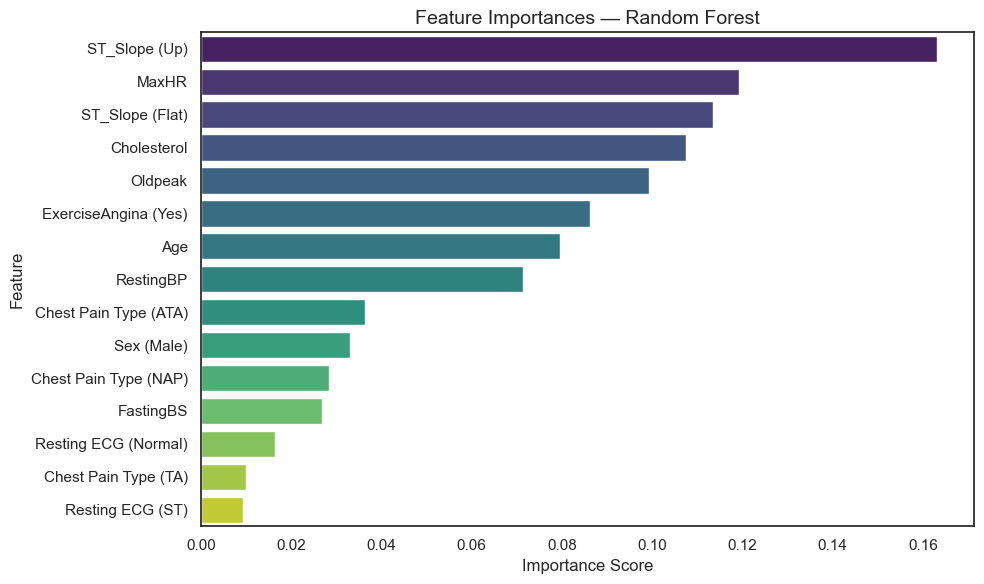

In [16]:
# Features Importance

# Extract trained model from pipeline
rf_model = rf_pipeline.named_steps["classifier"]

# Extract OneHotEncoder from pipeline
ohe = rf_pipeline.named_steps["preprocessor"].named_transformers_["cat"].named_steps["onehot"]

# Get feature names after encoding
onehot_feature_names = ohe.get_feature_names_out(categorical_cols)
all_features = numeric_cols + list(onehot_feature_names)

# Get feature importances
importances = rf_model.feature_importances_

# Build DataFrame
feat_df = pd.DataFrame({
    'Feature': all_features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# OPTIONAL: Feature mapping dictionary (for clarity in your report)
feature_mapping = {
    "ST_Slope_Up": "ST_Slope (Up)",
    "ST_Slope_Flat": "ST_Slope (Flat)",
    "ExerciseAngina_Y": "ExerciseAngina (Yes)",
    "Sex_M": "Sex (Male)",
    "ChestPainType_ATA": "Chest Pain Type (ATA)",
    "ChestPainType_NAP": "Chest Pain Type (NAP)",
    "ChestPainType_TA": "Chest Pain Type (TA)",
    "RestingECG_Normal": "Resting ECG (Normal)",
    "RestingECG_ST": "Resting ECG (ST)",
    # add more if needed
}

# Replace feature names with mapped names if available
feat_df['Feature'] = feat_df['Feature'].replace(feature_mapping)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Importance',
    y='Feature',
    data=feat_df.head(15),
    palette='viridis'
)
plt.title("Feature Importances — Random Forest", fontsize=14)
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

## Feature Importance Summary — Random Forest
-The plot above shows the top features contributing to the prediction of heart disease using the Random Forest model. Each bar represents the relative importance of a feature in the decision-making process of the model.

-ST_Slope_Up and MaxHR (maximum heart rate achieved) are the most influential predictors, suggesting that exercise-induced ST segment slope and heart rate response are strongly associated with heart disease risk.

-ST_Slope_Flat, Cholesterol, and Oldpeak (ST depression induced by exercise) also show high importance, reinforcing the clinical relevance of stress test indicators and blood lipid levels in prediction.

-Variables such as ExerciseAngina_Y, Age, and RestingBP play a moderate role in the model's decision-making, capturing important physiological and clinical aspects of cardiovascular health.

-Less influential features include certain chest pain types (e.g., ChestPainType_TA, NAP) and RestingECG variants (e.g., RestingECG_ST, RestingECG_Normal), which contribute less to overall predictions based on this dataset.